In [47]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_kidney_transplant
from lifelines.statistics import logrank_test

In [10]:
kidney_trans = load_kidney_transplant()
print(kidney_trans.shape)
kidney_trans.head(3)

(863, 6)


,time,death,age,black_male,white_male,black_female
0,1,0,46,0,1,0
1,5,0,51,0,1,0
2,7,1,55,0,1,0


In [65]:
kidney_trans.time.describe()

count     863.000000
mean     1379.787949
std      1009.908575
min         1.000000
25%       426.000000
50%      1269.000000
75%      2216.000000
max      3434.000000
Name: time, dtype: float64

In [27]:
kidney_trans.isna().sum()

time            0
death           0
age             0
black_male      0
white_male      0
black_female    0
dtype: int64

In [11]:
kapmei = KaplanMeierFitter()

<AxesSubplot:xlabel='timeline'>

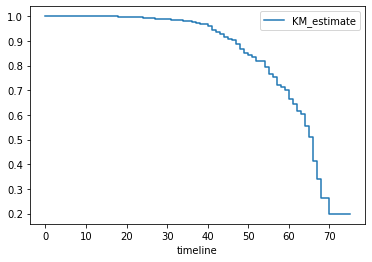

In [16]:
kapmei.fit(kidney_trans['age'], kidney_trans['death']).plot(ci_show = False)

<AxesSubplot:xlabel='timeline'>

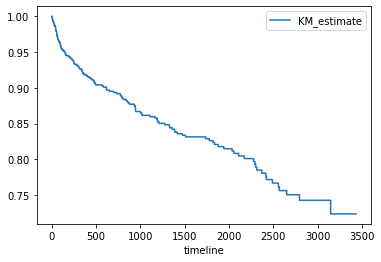

In [17]:
kapmei.fit(kidney_trans['time'], kidney_trans['death']).plot(ci_show = False)

## Gender Comparison

In [38]:
black_male     = kidney_trans[ kidney_trans['black_male'].astype(bool) ]
black_female   = kidney_trans[ kidney_trans['black_female'].astype(bool) ]

<AxesSubplot:xlabel='timeline'>

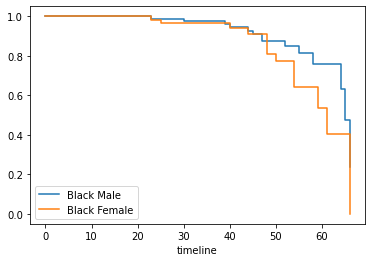

In [42]:
gender_plot = kapmei.fit(black_male['age'], black_male['death'], label = 'Black Male').plot(ci_show = False)
kapmei.fit(black_female['age'], black_female['death'], label = 'Black Female').plot(ax = gender_plot, ci_show = False)

In [56]:
analysis = logrank_test( durations_A = black_male['age'], durations_B = black_female['age'],
                         event_observed_A = black_male['death'], event_observed_B = black_female['death'])
analysis.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.44 0.12      3.08

0.11803231809231428


<AxesSubplot:xlabel='timeline'>

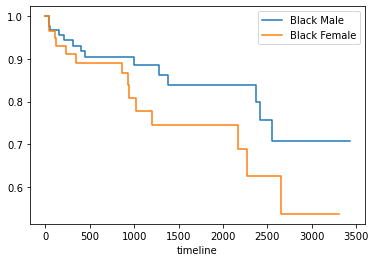

In [43]:
gender_plot = kapmei.fit(black_male['time'], black_male['death'], label = 'Black Male').plot(ci_show = False)
kapmei.fit(black_female['time'], black_female['death'], label = 'Black Female').plot(ax = gender_plot, ci_show = False)

In [57]:
analysis = logrank_test( durations_A = black_male['time'], durations_B = black_female['time'],
                         event_observed_A = black_male['death'], event_observed_B = black_female['death'])
analysis.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.02 0.16      2.69

## Race comparison

In [44]:
black_male     = kidney_trans[ kidney_trans['black_male'].astype(bool) ]
white_male     = kidney_trans[ kidney_trans['white_male'].astype(bool) ]

<AxesSubplot:xlabel='timeline'>

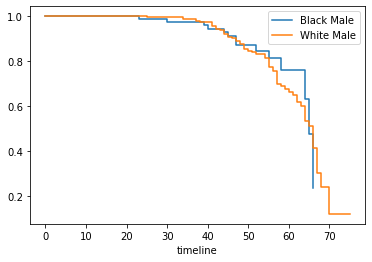

In [45]:
race_plot = kapmei.fit(black_male['age'], black_male['death'], label = 'Black Male').plot(ci_show = False)
kapmei.fit(white_male['age'], white_male['death'], label = 'White Male').plot(ax = race_plot, ci_show = False)

In [59]:
analysis = logrank_test( durations_A = black_male['age'], durations_B = white_male['age'],
                         event_observed_A = black_male['death'], event_observed_B = white_male['death'])
analysis.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.50

<AxesSubplot:xlabel='timeline'>

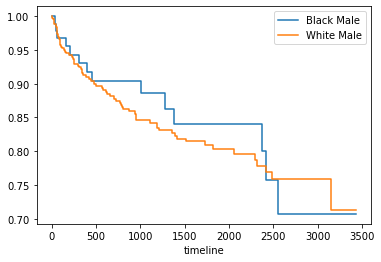

In [46]:
race_plot = kapmei.fit(black_male['time'], black_male['death'], label = 'Black Male').plot(ci_show = False)
kapmei.fit(white_male['time'], white_male['death'], label = 'White Male').plot(ax = race_plot, ci_show = False)

In [60]:
analysis = logrank_test( durations_A = black_male['time'], durations_B = white_male['time'],
                         event_observed_A = black_male['death'], event_observed_B = white_male['death'])
analysis.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.10 0.76      0.40

## Age Comparison

In [61]:
normaltest(kidney_trans['age'])

NormaltestResult(statistic=21.95648312577631, pvalue=1.706908606713197e-05)

In [62]:
median_age  = kidney_trans['age'].median()
younger     = kidney_trans[ kidney_trans['age'] < median_age ]
older       = kidney_trans[ kidney_trans['age'] >= median_age ]

<AxesSubplot:xlabel='timeline'>

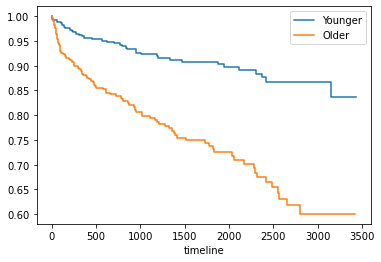

In [63]:
age_plot = kapmei.fit(younger['time'], younger['death'], label = 'Younger').plot(ci_show = False)
kapmei.fit(older['time'], older['death'], label = 'Older').plot(ax = age_plot, ci_show = False)

In [64]:
analysis = logrank_test( durations_A = younger['time'], durations_B = older['time'],
                         event_observed_A = younger['death'], event_observed_B = older['death'])
analysis.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          39.98 <0.005     31.86